In [32]:
import torch
import os
import matplotlib.pyplot as plt

In [46]:
checkpoints = os.listdir('checkpoints')

print(len(checkpoints))

all_rewards = []

for checkpoint in checkpoints:
    pth = os.path.join('checkpoints', checkpoint)
    rewards = torch.load(pth)
    if rewards.shape[-1] == 10_000:
        tot = max(rewards.sum(-1)).item()
        print(pth)
        print(tot)
        all_rewards.append((pth, rewards, tot))
        
print(len(all_rewards))

198
checkpoints/env=CartPole-v1-seed=1234-n_layers=2-grad_clip=5.0-hid_dim=128-init=xavier-n_runs=5-n_episodes=10000-discount_factor=0.99-start_epsilon=1.0-end_epsilon=0.01-exploration_time=0.4-optim=rmsprop-lr=5e-05_train.pt
116006.0
checkpoints/env=CartPole-v1-seed=1234-n_layers=1-grad_clip=5.0-hid_dim=256-init=xavier-n_runs=5-n_episodes=10000-discount_factor=0.9-start_epsilon=1.0-end_epsilon=0.01-exploration_time=0.8-optim=rmsprop-lr=5e-05_train.pt
179124.0
checkpoints/env=CartPole-v1-seed=1234-n_layers=1-grad_clip=0.1-hid_dim=256-init=xavier-n_runs=5-n_episodes=10000-discount_factor=0.9-start_epsilon=1.0-end_epsilon=0.01-exploration_time=0.6-optim=rmsprop-lr=0.005_train.pt
251220.0
checkpoints/env=CartPole-v1-seed=1234-n_layers=1-grad_clip=1.0-hid_dim=32-init=xavier-n_runs=5-n_episodes=10000-discount_factor=0.9-start_epsilon=1.0-end_epsilon=0.01-exploration_time=0.2-optim=rmsprop-lr=1e-05_test.pt
187895.0
checkpoints/env=CartPole-v1-seed=1234-n_layers=1-grad_clip=0.1-hid_dim=128-in

In [47]:
all_rewards.sort(key=lambda x: x[-1])

checkpoints/env=CartPole-v1-seed=1234-n_layers=1-grad_clip=0.1-hid_dim=256-init=xavier-n_runs=5-n_episodes=10000-discount_factor=0.9-start_epsilon=1.0-end_epsilon=0.01-exploration_time=0.6-optim=rmsprop-lr=0.005_test.pt
251220.0


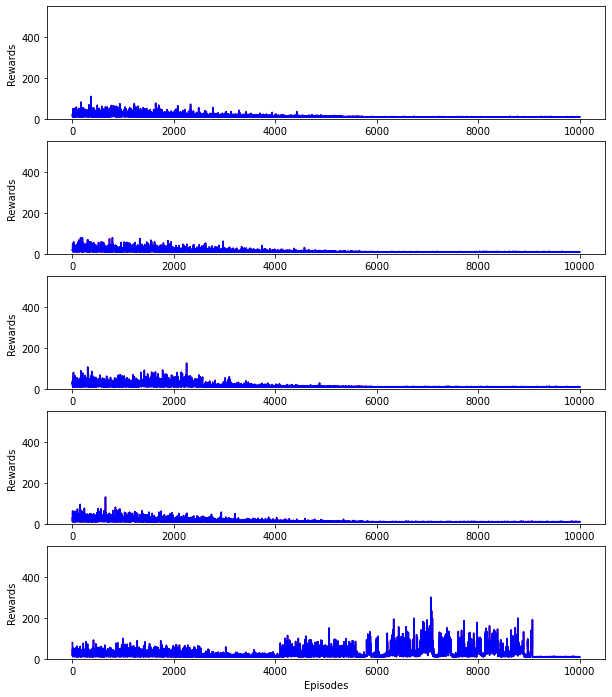

In [48]:
path, rewards, tot = all_rewards[-1]
print(path)
print(tot)
n_runs, n_episodes = rewards.shape
idxs = range(n_episodes)
fig, ax = plt.subplots(n_runs, figsize=(10,12))
for i, _ax in enumerate(ax):
    _ax.plot(idxs, rewards[i], c='red')
    _ax.plot(idxs, rewards[i], c='blue')
    _ax.set_ylim(0, 550)
    _ax.set_ylabel('Rewards');
    if i == n_runs - 1:
        _ax.set_xlabel('Episodes')

In [39]:
min_e = 0.01
max_e = 1.0
decay = 0.999
import numpy as np
import math
(min_e/max_e)/np.log(decay)

-9.994999166249727

In [6]:
x = (min_e/max_e)/math.log(decay, decay)

In [7]:
print(x)

0.01
